

# Project: Investigate a Dataset (TMDb Movie Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this project will we will do analysis for TMDB movie database that containing same information abdut 10000 movies this database has 10866 rows and 21 columms in this analysis we will use the following vaiables
> 1)  id 
>
> 2)  original_title 
>
> 3)  runtime 
>
> 4)  genres vote_count
>
> 5)  vote_average 
>
> 6)  release_year
>
>
> in this report we will the following questions:
> 1) Which movie in each release year has the highest vote average?
>
> 2) What is the most genre of films have been made? 
>
> 3) Does runtime affect the number of vote count?
>
> 4) How is Film industry trending over time?
>

In [1]:
#  imports the  packages that will be used 
import pandas as PD
import numpy as NP
import matplotlib.pyplot as PLT
%matplotlib inline
PLT.style.use('fivethirtyeight')

<a id='wrangling'></a>
## Data Wrangling


### General Properties for this data

###  Read the data from csv file:

In [2]:
# Read csv file
tmdb_Movies_Data = PD.read_csv('tmdb-movies (1).csv')

###  print the first 10 rows from database:

In [3]:
# See the first 10 rows 
tmdb_Movies_Data.head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

###  print the last 10 rows from database:

In [4]:
# See the last 10 rows 
tmdb_Movies_Data.tail(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10856,20277,tt0061135,0.140934,0,0,The Ugly Dachshund,Dean Jones|Suzanne Pleshette|Charles Ruggles|K...,NaN,Norman Tokar,A HAPPY HONEYMOON GOES TO THE DOGS!...When a G...,...,The Garrisons (Dean Jones and Suzanne Pleshett...,93,Comedy|Drama|Family,Walt Disney Pictures,2/16/66,14,5.7,1966,0.000000,0.0
10857,5921,tt0060748,0.131378,0,0,Nevada Smith,Steve McQueen|Karl Malden|Brian Keith|Arthur K...,NaN,Henry Hathaway,Some called him savage- and some called him sa...,...,Nevada Smith is the young son of an Indian mot...,128,Action|Western,Paramount Pictures|Solar Productions|Embassy P...,6/10/66,10,5.9,1966,0.000000,0.0
10858,31918,tt0060921,0.317824,0,0,"The Russians Are Coming, The Russians Are Coming",Carl Reiner|Eva Marie Saint|Alan Arkin|Brian K...,NaN,Norman Jewison,IT'S A PLOT! ...to make the world die laughing!!,...,"Without hostile intent, a Soviet sub runs agro...",126,Comedy|War,The Mirisch Corporation,5/25/66,11,5.5,1966,0.000000,0.0
10859,20620,tt0060955,0.089072,0,0,Seconds,Rock Hudson|Salome Jens|John Randolph|Will Gee...,NaN,John Frankenheimer,NaN,...,A secret organisation offers wealthy people a ...,100,Mystery|Science Fiction|Thriller|Drama,Gibraltar Productions|Joel Productions|John Fr...,10/5/66,22,6.6,1966,0.000000,0.0
10860,5060,tt0060214,0.087034,0,0,Carry On Screaming!,Kenneth Williams|Jim Dale|Harry H. Corbett|Joa...,NaN,Gerald Thomas,Carry On Screaming with the Hilarious CARRY ON...,...,The sinister Dr Watt has an evil scheme going....,87,Comedy,Peter Rogers Productions|Anglo-Amalgamated Fil...,5/20/66,13,7.0,1966,0.000000,0.0
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


### name of columns in this database

In [5]:
# Know the names columns
tmdb_Movies_Data.columns.values

array(['id', 'imdb_id', 'popularity', 'budget', 'revenue',
       'original_title', 'cast', 'homepage', 'director', 'tagline',
       'keywords', 'overview', 'runtime', 'genres',
       'production_companies', 'release_date', 'vote_count',
       'vote_average', 'release_year', 'budget_adj', 'revenue_adj'],
      dtype=object)

### Information about database

In [6]:
# Some information for each column
tmdb_Movies_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

#### After seeing the columns information, it was noticed that some columns contain null values 


###  the number of null values in every columns

In [7]:
# Calculate the number of null value for each column
tmdb_Movies_Data.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

###  Check the number of duplicated rows.

In [8]:
# Calculate the number of duplicated rows
tmdb_Movies_Data.duplicated().sum()

1

### see the summary statistics for numerical columns

In [9]:
# Calculate some statistics
tmdb_Movies_Data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### 1) Delete columns we don't need

In [10]:
# List containing the names of the columns to be deleted
NamesOfColumnsDeleted = ['homepage','production_companies','keywords','revenue_adj', 'imdb_id','popularity','budget','cast','revenue','director','tagline','overview','release_date','budget_adj','revenue_adj']
# Drop the columns
tmdb_Movies_Data = tmdb_Movies_Data.drop(NamesOfColumnsDeleted,1)
# Print the columns names to make sure the columns are deleted
tmdb_Movies_Data.columns.values

array(['id', 'original_title', 'runtime', 'genres', 'vote_count',
       'vote_average', 'release_year'], dtype=object)

In [11]:
# some information for each column
tmdb_Movies_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10866 non-null  int64  
 1   original_title  10866 non-null  object 
 2   runtime         10866 non-null  int64  
 3   genres          10843 non-null  object 
 4   vote_count      10866 non-null  int64  
 5   vote_average    10866 non-null  float64
 6   release_year    10866 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 594.4+ KB


###  2)  in numerical columns replace the rows that has valuses 0 with the mean of this column

In [12]:
# Calculate the mean for vote_count column and replace each row has the value 0 with it
tmdb_Movies_Data['vote_count'] = tmdb_Movies_Data['vote_count'].replace(0, tmdb_Movies_Data['vote_count'].mean())
# Calculate the mean for vote_average column and replace each row has the value 0 with it
tmdb_Movies_Data['vote_average'] = tmdb_Movies_Data['vote_average'].replace(0, tmdb_Movies_Data['vote_average'].mean())

### 3) Delete the rows that has null values

In [13]:
# See if there are rows that contain a null value
tmdb_Movies_Data.isnull().sum()

id                 0
original_title     0
runtime            0
genres            23
vote_count         0
vote_average       0
release_year       0
dtype: int64

In [14]:
# Delete the rows that contain a null value
tmdb_Movies_Data = tmdb_Movies_Data[tmdb_Movies_Data["genres"].isnull() == False]
# Calculate the number of null value for each column to make sure there is no rows has null value 
tmdb_Movies_Data.isnull().sum()

id                0
original_title    0
runtime           0
genres            0
vote_count        0
vote_average      0
release_year      0
dtype: int64

In [15]:
# Dropping duplicates rows
tmdb_Movies_Data = tmdb_Movies_Data.drop_duplicates()
# Calculate the number duplicates rows to make sure there is no duplicates rows
tmdb_Movies_Data.duplicated().sum()

0

### Delete the rows that has runtime less than 60

In [16]:
# Delete the rows who has runtime < 60
tmdb_Movies_Data = tmdb_Movies_Data[tmdb_Movies_Data.runtime >= 60]
# See some information for each column after deletion
tmdb_Movies_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10531 entries, 0 to 10865
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10531 non-null  int64  
 1   original_title  10531 non-null  object 
 2   runtime         10531 non-null  int64  
 3   genres          10531 non-null  object 
 4   vote_count      10531 non-null  int64  
 5   vote_average    10531 non-null  float64
 6   release_year    10531 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 658.2+ KB


<a id='eda'></a>
## Exploratory Data Analysis


### Which movie in each release year has the highest vote average?

In [17]:
#Sort the rows in descending order based on vote_average rows and than drop duplicates release_year
highestVoteAverage = tmdb_Movies_Data.sort_values('vote_average',ascending = False).drop_duplicates(['release_year'])
# Sort the rows in ascending order order based on release_year rows
highestVoteAverage = highestVoteAverage.sort_values('release_year')
# see the original_title and vote_average and release_year for the movie that has highest vote average in each release year
highestVoteAverage[['vote_average','original_title','release_year']]

,vote_average,original_title,release_year
10141,8.0,Psycho,1960
10131,7.5,"One, Two, Three",1961
9852,7.7,To Kill a Mockingbird,1962
10446,7.5,The Great Escape,1963
9882,7.7,Dr. Strangelove or: How I Learned to Stop Worr...,1964
10708,7.2,The Hill,1965
10822,7.5,Who's Afraid of Virginia Woolf?,1966
10402,7.6,Bonnie and Clyde,1967
9719,7.7,2001: A Space Odyssey,1968
10736,7.3,Kes,1969


### Based on the previous question what are the three release years with the highest vote average?

In [18]:
def ChangeNamesOfAxesGraphic(yLabel , XLabel , title):
    # set the label y and title of the scatter 
    PLT.ylabel(yLabel)
   # set the label x
    PLT.xlabel(XLabel)
    # set the title
    PLT.title(title)
    # show the digrame
    PLT.show()
    

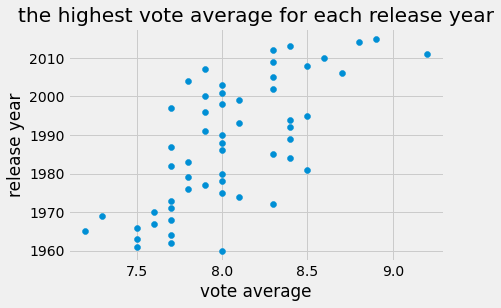

In [19]:
# Show the data in scatter chart
PLT.scatter(highestVoteAverage['vote_average'], highestVoteAverage['release_year'], alpha= 1)
# Call this function to set the label x ,label y and title of the scatter 
ChangeNamesOfAxesGraphic('release year', 'vote average' , 'the highest vote average for each release year')


### Based on the above figure the top 3 release years is 2011 , 2015 ,2014 and 2010

### The number of films made for each genre

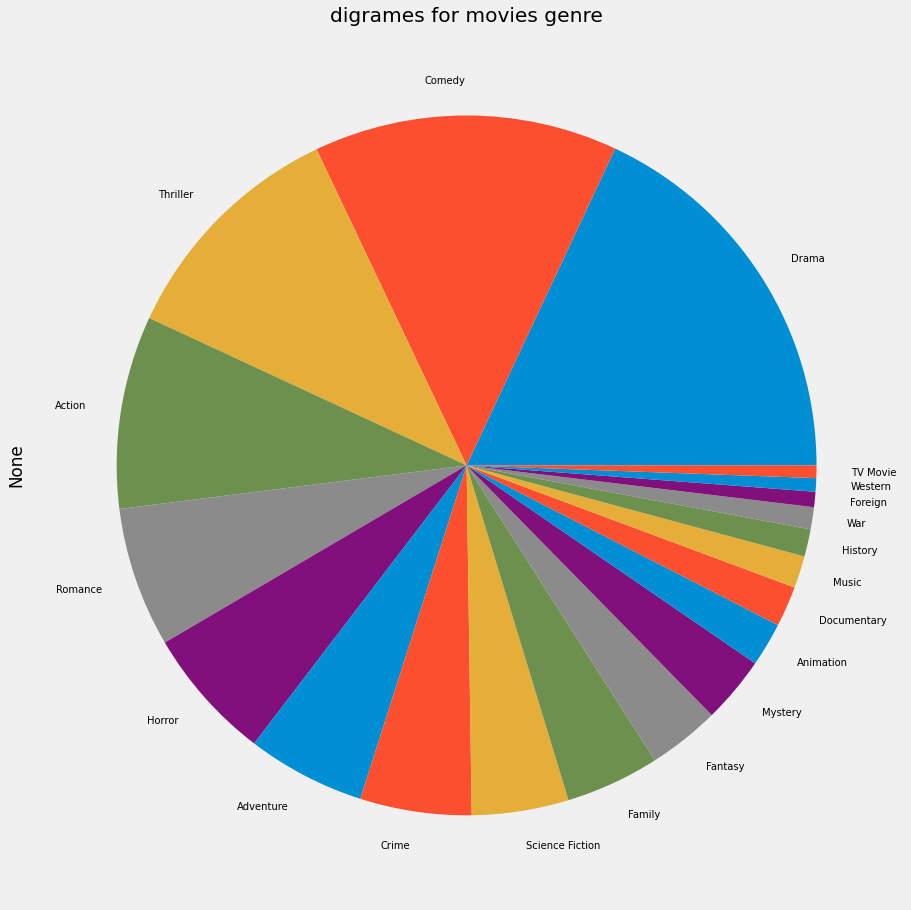

In [20]:
# Count the number of movies for each genre and than show in pie chart 
PD.Series(tmdb_Movies_Data['genres'].str.cat(sep = '|').split('|')).value_counts().plot.pie(figsize=(15,15), fontsize=10).set(title = 'digrames for movies genre')
PLT.show()

#### In the above figure, we note that the most rated films have been made is drama, and the lowest rating is western

### Is there a relationship between runtime and vote count

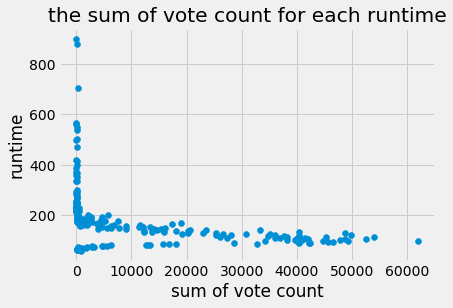

In [21]:
# Calculate the number of vote_count for each runtime
sumVoteCount = tmdb_Movies_Data.groupby(['runtime'] , as_index = False)['vote_count'].sum()
# Show the data in scatter chart
PLT.scatter(sumVoteCount['vote_count'], sumVoteCount['runtime'] )
# Call this function to set the label x ,label y and title of the scatter 
ChangeNamesOfAxesGraphic('runtime', 'sum of vote count' , 'the sum of vote count for each runtime')


###  In the above figure, we note there is a relationship between the runtime and vote count which is less runtime more votes count

### Is the number of films increasing or decreasing over the years?

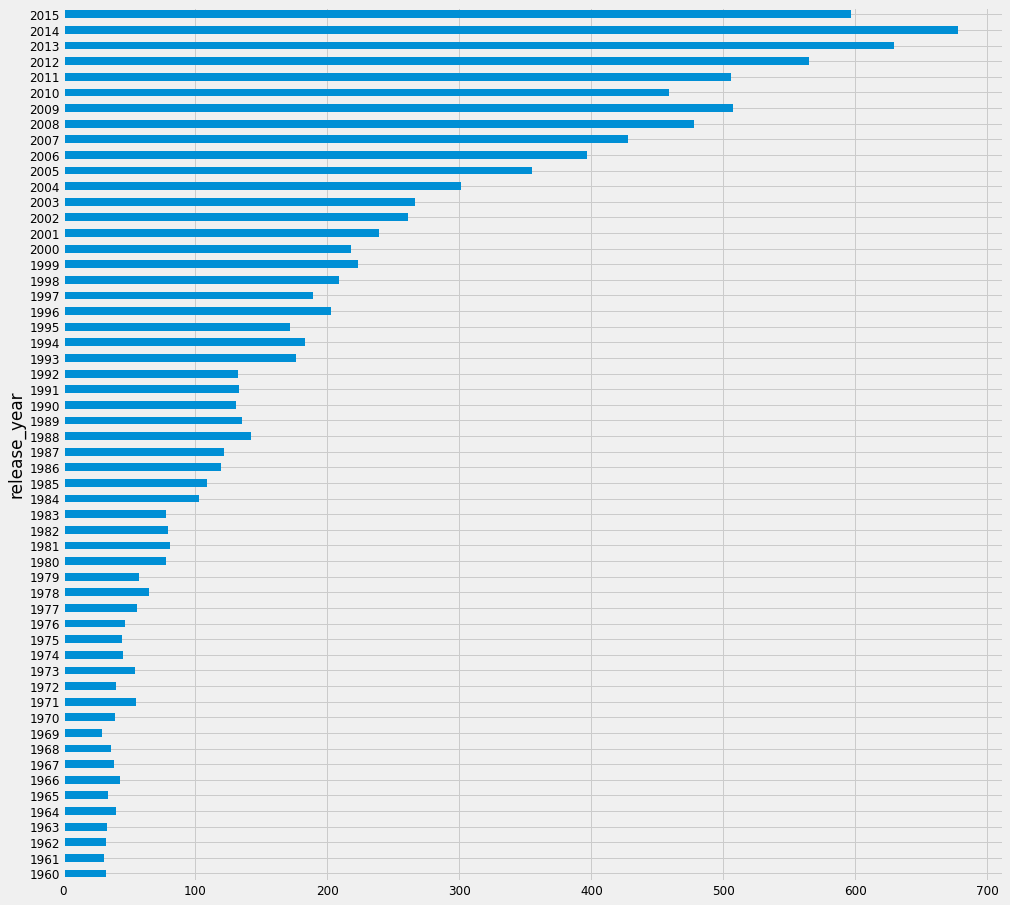

In [22]:
# Count the number of movies for each release_year and than show in plot chart
tmdb_Movies_Data.groupby(['release_year'] )['id'].count().plot.barh(figsize=(15,15),fontsize = 12)
PLT.show()

### the number of films is increasing over the years

<a id='conclusions'></a>
## Conclusions

>  in this project we have analysis TMDB movie dataset to to answer some questions based on the data that we got but the data It had some problems like null values,extra columns and missing values and after dealing with these problems it became possible to analysis and get the answers to the questions we want and visualizations we get that 
> 1) The number of films increasing over the years                             >                                                
> 2) Whenever the runtime is lower than we will have more votes count           >                                                 
> 3)The most popular genres is drama 

## limitations

> In this database we have some problems like a lot of missing in some columms like production_companies,homepage and tagline.
> 
> Droppin null values from genres may be affect the results of analysis